In [2]:
#Python
import os
# Setting path to project root
os.chdir(os.path.dirname(os.path.abspath("../../DICE_PRIME_PY/app.py")))

In [6]:
# Charts / Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



df = pd.read_json("./rttm/dataset/test_leak.json")
df.head()

,Pressure,Velocity,elevation_profiles,Density,t_step,Length,dx,x,Sim_time,nodes,...,InPressSim,InPressMeasure,OutPressSim,OutPressMeasure,is_gas,input_leak_percentage,input_leak_position,input_leak_zone,is_leak,cpu_time
0,"[[15534300.0, 15521356.29268491, 15518849.3944...","[[2.7540643877, 2.7540643877, 2.7540643877, 2....","[-0.023601151600000002, 0.0042125077000000006,...","[[980.0, 980.0, 980.0, 980.0, 980.0, 980.0, 98...","[0.0, 0.0852864012, 0.1705728024, 0.2558592036...",31879.638927,"[45.9827072656, 45.9593400855, 45.9926854947, ...","[45.9827072656, 91.9420473511, 137.9347328459,...",45,253,...,"[15534300.0, 15534300.0, 15534300.0, 15534300....","[15534300.0, 15534300.0, 15534300.0, 15534300....","[6435767.444527423, 6542613.51246, 6542613.512...","[6542613.51246, 6542613.51246, 6542613.51246, ...",0,0.04,0.5,4,1,5.031717


In [5]:
def convert_column_to_df(df, column):
    # define a function to convert a collection of arrays into a DataFrame
    def collection_to_dataframe(collection):
        # create a 2D numpy array from the collection
        arr = np.array(collection)
        # transpose the array to put each element in a separate row
        arr = arr.T
        # create a DataFrame from the array
        return pd.DataFrame(arr)

    # apply the function to each column
    df_col = df[column].apply(collection_to_dataframe)

    # concatenate the resulting DataFrames along axis 2
    df_col = pd.concat(df_col.values.tolist(), axis=1)

    # set the column names of the new DataFrames
    df_col.columns = [f'{i}' for i in range(df_col.shape[1])]
    
    return df_col

## Generating dataframe

In [52]:
##TODO: Confirm velocity units
pressure = convert_column_to_df(df, 'Pressure')/10**6 # x axis → distance, y axis → time]
velocity = convert_column_to_df(df, 'Velocity') # x axis → distance, y axis → time

t_step = np.array(df['t_step'][0])
sim_time = np.array(df['Sim_time'])[0] #single Value, s

#dx = np.array(df['dx'][0])
x = np.array(df['x'][0])
length = df['Length'][0] #single Value, meters

# Metadata
is_gas = df['is_gas'][0]
input_leak_percentage = df['input_leak_percentage'][0]
input_leak_position = df['input_leak_position'][0]
input_leak_zone = df['input_leak_zone'][0]
is_leak = df['is_leak'][0]
cpu_time = df['cpu_time'][0]
type(is_gas)

numpy.int64

In [61]:
def create_summary_df(data_list, names=None):
    summary_dict = {}
    for i, data in enumerate(data_list):
        if isinstance(data, pd.DataFrame):
            summary_dict[f'{names[i]}' if names else f'Dataframe {i+1}'] = [
                data.shape, 
                data.values.min(), 
                data.values.mean(), 
                data.values.max(), 
                data.values.sum(),
                data.values.var(), 
                data.values.std()
            ]
        elif isinstance(data, np.ndarray):
            summary_dict[f'{names[i]}' if names else f'Numpy array {i+1}'] = [
                len(data),
                data.min(),
                data.mean(),
                data.max(),
                data.sum(),
                data.var(),
                data.std()
            ]
        elif isinstance(data, (int, float, np.int64, np.float64)):
            summary_dict[f'{names[i]}' if names else f'Number {i+1}'] = [
                1,
                data,
                data,
                data,
                data,
                None,
                None
            ]

    summary_df = pd.DataFrame.from_dict(
        summary_dict, 
        orient='index', 
        columns=[
            'Number of Elements',
            'Minimum', 
            'Average', 
            'Maximum',
            'Sum',
            'Variance', 
            'Std Dev'
        ]
    )
    return summary_df

In [62]:
create_summary_df([pressure, velocity, t_step, sim_time, x, length, is_gas, input_leak_percentage, input_leak_position, input_leak_zone, is_leak, cpu_time], ['Pressure', 'Velocity', 'Time Step', 'Simulation Time', 'x', 'Length', 'is_gas', 'input_leak_percentage', 'input_leak_position', 'input_leak_zone', 'is_leak', 'cpu_time'])

,Number of Elements,Minimum,Average,Maximum,Sum,Variance,Std Dev
Pressure,"(253, 529)",6.400531,11.038918,15.552592,1.477416e+06,8.152776e+00,2.855307
Velocity,"(253, 529)",2.558611,2.739057,2.918929,3.665871e+05,1.347116e-02,0.116065
Time Step,529,0.000000,22.515610,45.031220,1.191076e+04,1.696243e+02,13.023990
Simulation Time,1,45.000000,45.000000,45.000000,4.500000e+01,NaN,NaN
x,252,45.982707,14648.813815,31879.638927,3.691501e+06,1.005579e+08,10027.856984
Length,1,31879.638927,31879.638927,31879.638927,3.187964e+04,NaN,NaN
is_gas,1,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN
input_leak_percentage,1,0.040000,0.040000,0.040000,4.000000e-02,NaN,NaN
input_leak_position,1,0.500000,0.500000,0.500000,5.000000e-01,NaN,NaN
input_leak_zone,1,4.000000,4.000000,4.000000,4.000000e+00,NaN,NaN


## Subplot Grid

 ### Pressure x Distance (Fixed Time)


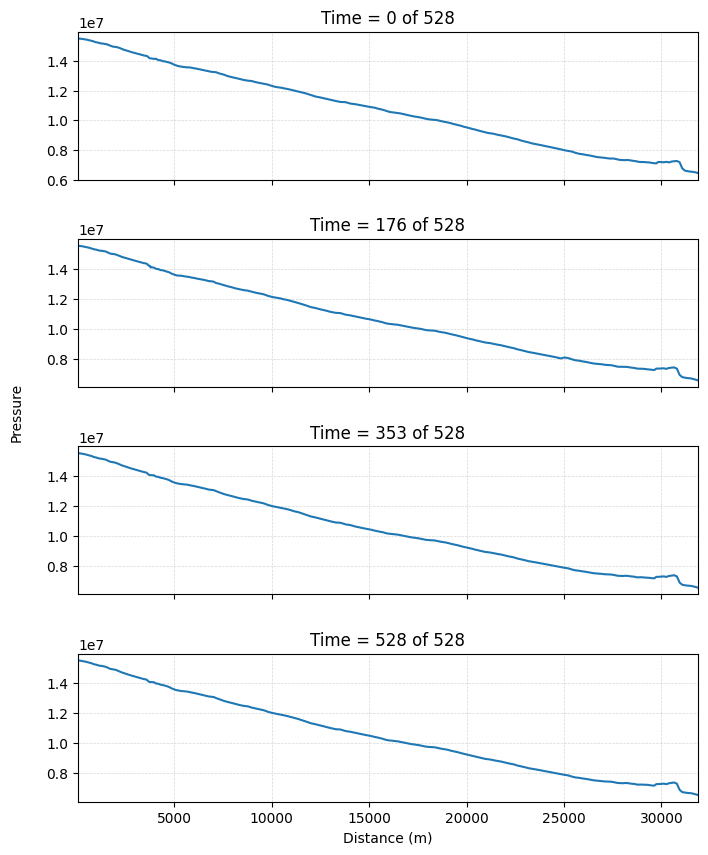

In [5]:
# create a grid of four subplots
# Sharex → share the x-axis
fig, axs = plt.subplots(4, 1, figsize=(8, 10), sharex=True)

# set the y-axis label
fig.text(0.04, 0.5, 'Pressure [MPa]', va='center', rotation='vertical')

labels = [0]
labels.append(round(1/3 * pressure.shape[1]))
labels.append(round(2/3 * pressure.shape[1]))
labels.append(max(pressure.shape[1]-1, 0))

# plot each subplot
for i in range(0,len(labels)):
    axs[i].plot(x, pressure.iloc[1:, labels[i]])
    axs[i].set_title('Time = ' + str(labels[i]) + ' of ' + str(pressure.shape[1]-1))
    
    #axs[i].tick_params(axis='both', labelsize=10)
    # Adding gridlines
    axs[i].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    
    axs[i].set_xlim(min(x), max(x))

# set the x-axis label for the last subplot only
axs[-1].set_xlabel('Distance (m)')

# adjust the subplot spacing
plt.subplots_adjust(hspace=0.4)

# show the plot
plt.show()

### Pressure x Time (Fixed Distance)

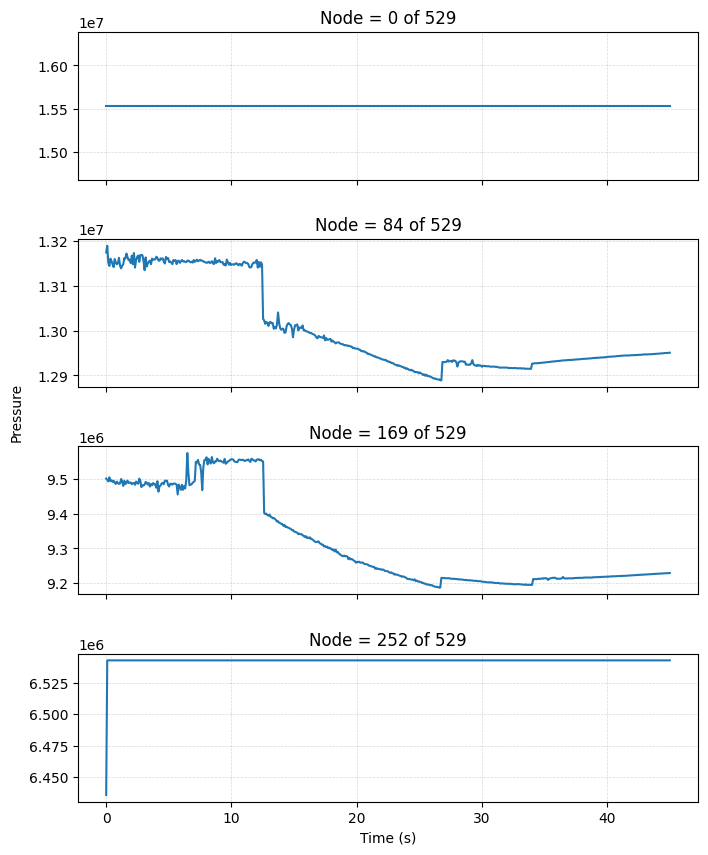

In [6]:
# create a grid of four subplots
# Sharex → share the x-axis
fig, axs = plt.subplots(4, 1, figsize=(8, 10), sharex=True)

# set the y-axis label
fig.text(0.04, 0.5, 'Pressure [MPa]', va='center', rotation='vertical')

labels = [0]
labels.append(round(1/3 * pressure.shape[0]))
labels.append(round(2/3 * pressure.shape[0]))
labels.append(max(pressure.shape[0]-1, 0))

# plot each subplot
for i in range(0,len(labels)):
    axs[i].plot(t_step, pressure.iloc[labels[i] , :])
    axs[i].set_title('Node = ' + str(labels[i]) + ' of ' + str(pressure.shape[1]))
    
    axs[i].tick_params(axis='both', labelsize=10)
    # Adding gridlines
    axs[i].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    
    #axs[i].set_xlim(min(x), max())

# set the x-axis label for the last subplot only
axs[-1].set_xlabel('Time (s)')

# adjust the subplot spacing
plt.subplots_adjust(hspace=0.4)

# show the plot
plt.show()

### Velocity x Distance (Fixed Time)

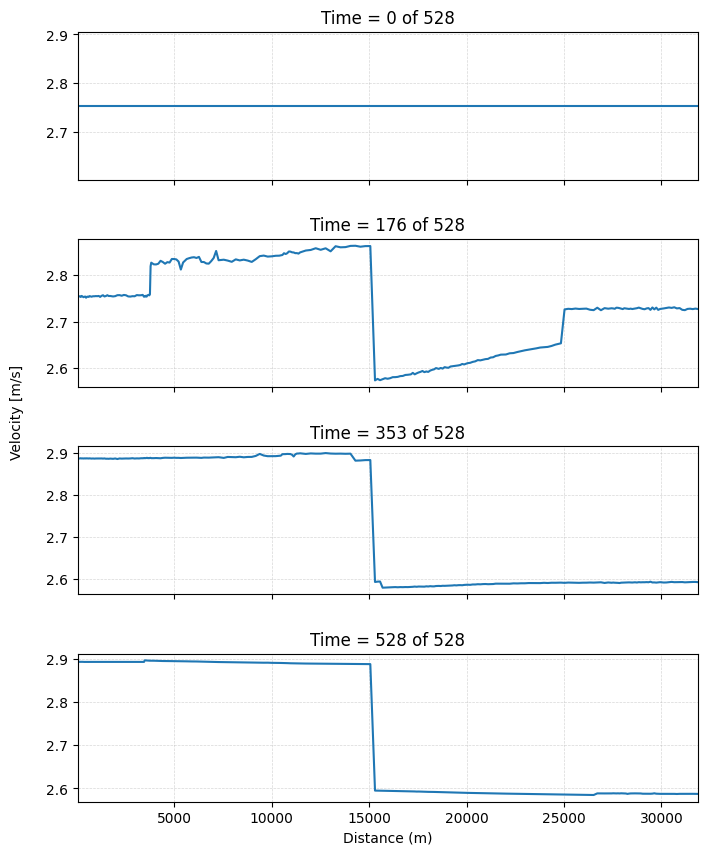

In [108]:
# create a grid of four subplots
# Sharex → share the x-axis
fig, axs = plt.subplots(4, 1, figsize=(8, 10), sharex=True)

# set the y-axis label
#TODO: Confirm Units
fig.text(0.04, 0.5, 'Velocity [m/s]', va='center', rotation='vertical')

labels = [0]
labels.append(round(1/3 * velocity.shape[1]))
labels.append(round(2/3 * velocity.shape[1]))
labels.append(max(velocity.shape[1]-1, 0))

# plot each subplot
for i in range(0,len(labels)):
    axs[i].plot(x, velocity.iloc[1:, labels[i]])
    axs[i].set_title('Time = ' + str(labels[i]) + ' of ' + str(velocity.shape[1]-1))
    
    #axs[i].tick_params(axis='both', labelsize=10)
    # Adding gridlines
    axs[i].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    
    axs[i].set_xlim(min(x), max(x))

# set the x-axis label for the last subplot only
axs[-1].set_xlabel('Distance (m)')

# adjust the subplot spacing
plt.subplots_adjust(hspace=0.4)

# show the plot
plt.show()

### Velocity x Time (Fixed Distance)

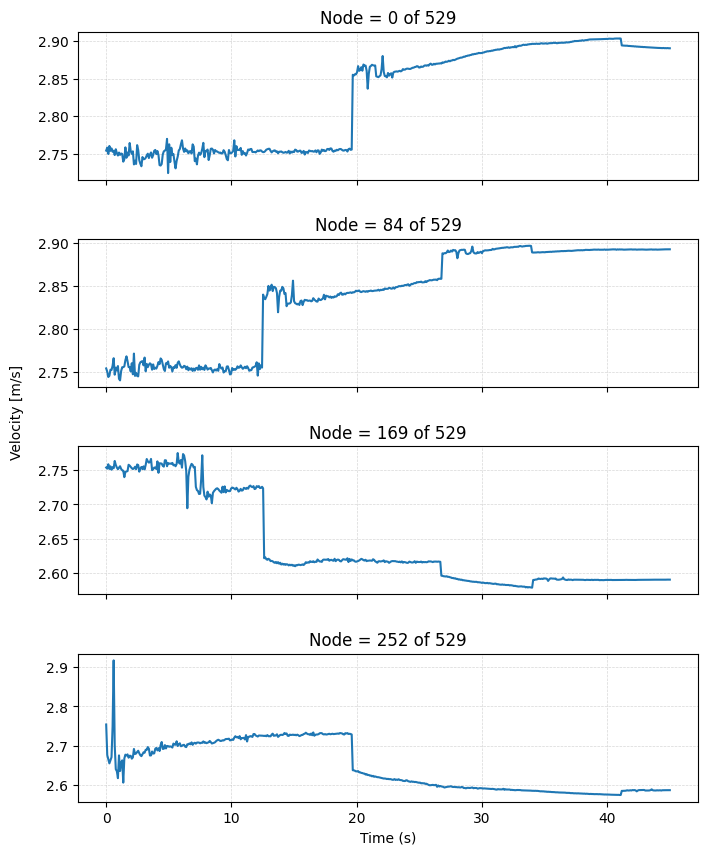

In [109]:
# create a grid of four subplots
# Sharex → share the x-axis
fig, axs = plt.subplots(4, 1, figsize=(8, 10), sharex=True)

## TODO: Confirm Units
# set the y-axis label
fig.text(0.04, 0.5, 'Velocity [m/s]', va='center', rotation='vertical')

labels = [0]
labels.append(round(1/3 * velocity.shape[0]))
labels.append(round(2/3 * velocity.shape[0]))
labels.append(max(velocity.shape[0]-1, 0))

# plot each subplot
for i in range(0,len(labels)):
    axs[i].plot(t_step, velocity.iloc[labels[i] , :])
    axs[i].set_title('Node = ' + str(labels[i]) + ' of ' + str(velocity.shape[1]))
    
    axs[i].tick_params(axis='both', labelsize=10)
    # Adding gridlines
    axs[i].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    
    #axs[i].set_xlim(min(x), max())

# set the x-axis label for the last subplot only
axs[-1].set_xlabel('Time (s)')

# adjust the subplot spacing
plt.subplots_adjust(hspace=0.4)

# show the plot
plt.show()

## Single Plots

### Pressure x Distance (Fixed Time)

In [9]:
range(len(pressure))

range(0, 253)

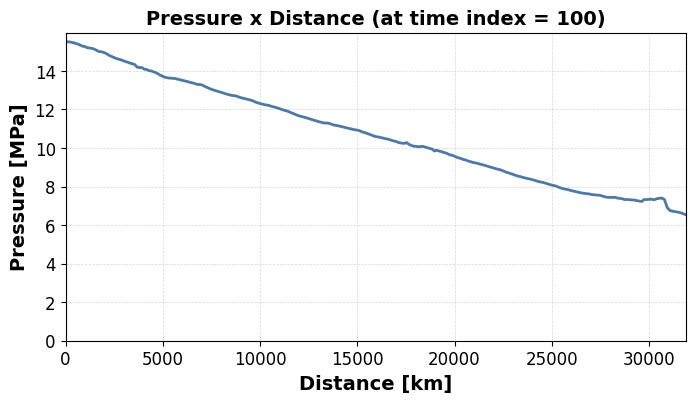

In [65]:
import matplotlib.pyplot as plt

time_index = 100

# Create a line plot of pressure vs. time
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, pressure.iloc[1:, time_index], color='#4e79a7', linewidth=2)

# Add axis labels and title
ax.set_xlabel('Distance [km]', fontsize=14, fontweight='bold')
ax.set_ylabel('Pressure [MPa]', fontsize=14, fontweight='bold')
ax.set_title('Pressure x Distance (at time index = ' + str(time_index) + ')', y=1.00, ha='center', fontsize=14, fontweight = 'bold')


# Customize tick labels
ax.tick_params(axis='both', labelsize=12)

# Add gridlines
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Add annotations for min and max values
ax.annotate('Min Pressure', xy=(6, 95), xytext=(6.5, 100), fontsize=12, fontweight='bold', arrowprops=dict(facecolor='#4e79a7', arrowstyle='->', linewidth=1))
ax.annotate('Max Pressure', xy=(2, 120), xytext=(2.5, 110), fontsize=12, fontweight='bold', arrowprops=dict(facecolor='#4e79a7', arrowstyle='->', linewidth=1))

# Set limits for x and y axis
ax.set_xlim(left=0, right=max(x)-1)
ax.set_ylim(bottom=0)

# Remove top and right spines
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

# Display the plot
plt.show()

### Pressure x Time (Fixed Distance)

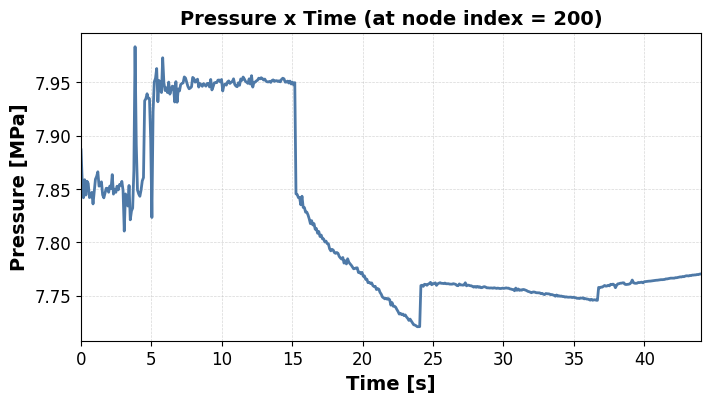

In [74]:
import matplotlib.pyplot as plt

node_index = 200

# Create a line plot of pressure vs. time
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t_step, pressure.iloc[node_index, :], color='#4e79a7', linewidth=2)

# Add axis labels and title
ax.set_xlabel('Time [s]', fontsize=14, fontweight='bold')
ax.set_ylabel('Pressure [MPa]', fontsize=14, fontweight='bold')
ax.set_title('Pressure x Time (at node index = ' + str(node_index) + ')', y=1.00, ha='center', fontsize=14, fontweight = 'bold')

# Customize tick labels
ax.tick_params(axis='both', labelsize=12)

# Add gridlines
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Set limits for x and y axis
ax.set_xlim(left=0, right=max(t_step)-1)
#ax.set_ylim(bottom=11, top=13)

# Remove top and right spines
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

# Display the plot
plt.show()

### Velocity x Distance (Fixed Time)

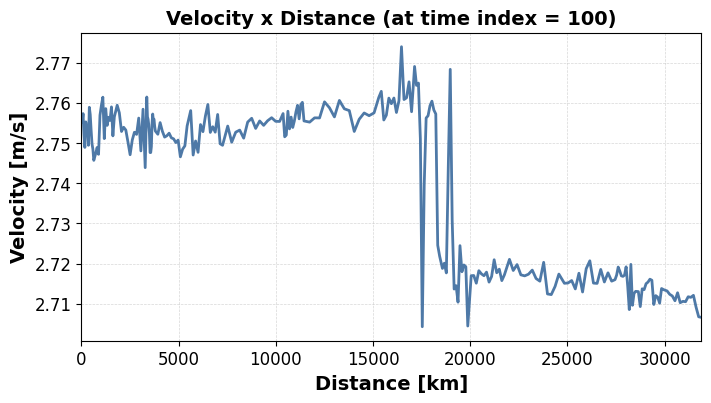

In [113]:
import matplotlib.pyplot as plt

time_index = 100

# Create a line plot of pressure vs. time
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, velocity.iloc[1:, time_index], color='#4e79a7', linewidth=2)

# Add axis labels and title
ax.set_xlabel('Distance [km]', fontsize=14, fontweight='bold')
ax.set_ylabel('Velocity [m/s]', fontsize=14, fontweight='bold')
ax.set_title('Velocity x Distance (at time index = ' + str(time_index) + ')', y=1.00, ha='center', fontsize=14, fontweight = 'bold')


# Customize tick labels
ax.tick_params(axis='both', labelsize=12)

# Add gridlines
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Set limits for x and y axis
ax.set_xlim(left=0, right=max(x)-1)
#ax.set_ylim(bottom=0)

# Remove top and right spines
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

# Display the plot
plt.show()

### Velocity x Time (Fixed Distance)

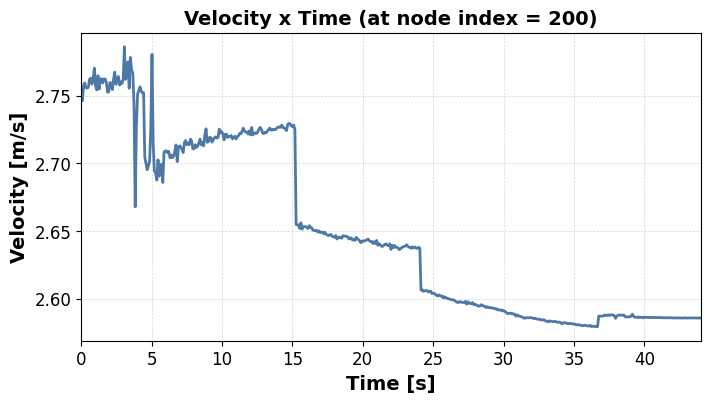

In [114]:
import matplotlib.pyplot as plt

node_index = 200

# Create a line plot of pressure vs. time
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t_step, velocity.iloc[node_index, :], color='#4e79a7', linewidth=2)

# Add axis labels and title
ax.set_xlabel('Time [s]', fontsize=14, fontweight='bold')
ax.set_ylabel('Velocity [m/s]', fontsize=14, fontweight='bold')
ax.set_title('Velocity x Time (at node index = ' + str(node_index) + ')', y=1.00, ha='center', fontsize=14, fontweight = 'bold')

# Customize tick labels
ax.tick_params(axis='both', labelsize=12)

# Add gridlines
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Set limits for x and y axis
ax.set_xlim(left=0, right=max(t_step)-1)
#ax.set_ylim(bottom=11, top=13)

# Remove top and right spines
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

# Display the plot
plt.show()